In [1]:
# 1. Jupyter Notebook에서 ai 가상환경에서 Pandas package를 설치하는 스크립트를 작성하시오.
! pip install pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import json

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)           # 맑은 고딕 폰트 지정
plt.rcParams["font.size"] = 12         # 글자 크기
plt.rcParams["figure.figsize"] = (10, 4) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

# Jupyter에게 matplotlib 그래프를 출력 영역에 표시할 것을 지시하는 명령
%matplotlib inline

In [2]:
# 2. pd.Series 타입에 데이터와 index를 지정한 객체를 만들어 출력하는 스크립트를 작성하시오.

obj = pd.Series(['왕눈이', 25, '남', '컴퓨터공학', '군필'], index=['이름', '나이', '성별', '전공', '기타'])
print(obj)

이름      왕눈이
나이       25
성별        남
전공    컴퓨터공학
기타       군필
dtype: object


In [3]:
# 3. 변수가 3개 이상으로 구성된 pd.DataFrame을 제작하시오.

data = {'이름':['왕눈이', '아로미', '투투', '개구리'],
        '나이' : [25, 21, 40, 1],
        '성별' : ['남', '여', '남', '여']}
df = pd.DataFrame(data)
df

,이름,나이,성별
0,왕눈이,25,남
1,아로미,21,여
2,투투,40,남
3,개구리,1,여


In [4]:
# 4. DataFrame에서 loc 함수를 사용하는 스크립트를 제작하시오.
df_loc = df.loc[:, '나이']
df_loc

0    25
1    21
2    40
3     1
Name: 나이, dtype: int64

In [5]:
# 5. DataFrame에서 iloc 함수를 사용하는 스크립트를 제작하시오.
df_iloc = df.iloc[:, 1] # row: 3, col: 0 ~ 1
df_iloc

0    25
1    21
2    40
3     1
Name: 나이, dtype: int64

In [6]:
# 6. DataFrame 생성시 NaN을 지정하고 숫자 0등 특정 값으로 변경하는 스크립트를 제작하시오.
df2 = pd.DataFrame({'국어': [90, 80, np.nan], '영어':[60, np.nan, 80], '수학':[np.nan, 60, 70]})
df3 = df2.fillna(0)
df3

,국어,영어,수학
0,90.0,60.0,0.0
1,80.0,0.0,60.0
2,0.0,80.0,70.0


In [7]:
# 7. 월별 매출액이 들어간 데이터 프레임을 만들고 line 그래프로 시각화하시오.
sales = pd.read_csv('./data/서울시 우리마을가게 상권분석서비스(상권-추정매출)_utf8.csv')
sales.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,2019,4,U,관광특구,1001496,강남 마이스 관광특구,CS300043,전자상거래업,16243089,458,...,0,117,341,5,71,195,156,26,5,7
1,2019,4,U,관광특구,1001496,강남 마이스 관광특구,CS300035,인테리어,57290367,739,...,0,369,370,0,0,369,370,0,0,4
2,2019,4,U,관광특구,1001496,강남 마이스 관광특구,CS300032,가전제품,2418241704,11633,...,336,4998,5696,138,2886,3045,2122,1094,1403,8
3,2019,4,U,관광특구,1001496,강남 마이스 관광특구,CS300031,가구,9035390798,5146,...,0,2185,2749,0,105,387,1234,1445,1762,5
4,2019,4,U,관광특구,1001496,강남 마이스 관광특구,CS300028,화초,702775358,12583,...,343,7078,4510,115,3126,3837,2602,1107,798,6


In [50]:
monthly_sales = sales[sales['상권_구분_코드_명']=='전통시장'].pivot_table(values='당월_매출_금액',
                                  index='상권_코드_명',
                                  columns='기준_분기_코드',
                                  aggfunc='sum' )
monthly_sales['sum'] = monthly_sales[1]+monthly_sales[2]+monthly_sales[3]+monthly_sales[4]
# monthly_sales
monthly_sales_desc = monthly_sales.sort_values(by='sum', ascending=False).head()

In [71]:
monthly_sales_desc

기준_분기_코드,1,2,3,4,sum
상권_코드_명,,,,,
영등포전통시장,5.733854e+11,5.804022e+11,7.356926e+11,8.342482e+11,2.723728e+12
평화시장,5.281205e+11,6.087253e+11,6.478165e+11,7.005383e+11,2.485201e+12
남대문시장,3.207516e+11,3.626862e+11,4.094887e+11,4.992799e+11,1.592206e+12
경동시장,1.963757e+11,1.696244e+11,2.570930e+11,2.469601e+11,8.700532e+11
마포농수산물시장,9.861130e+10,9.882381e+10,1.171168e+11,2.788149e+11,5.933668e+11


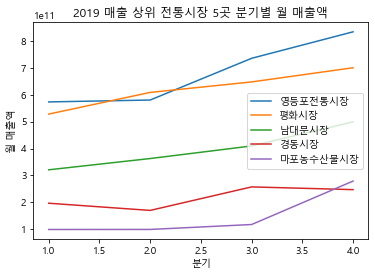

In [92]:
monthly_sales_desc.loc['영등포전통시장', [1,2,3,4]].plot()
monthly_sales_desc.loc['평화시장', [1,2,3,4]].plot()
monthly_sales_desc.loc['남대문시장', [1,2,3,4]].plot()
monthly_sales_desc.loc['경동시장', [1,2,3,4]].plot()
monthly_sales_desc.loc['마포농수산물시장', [1,2,3,4]].plot()
plt.title("2019 매출 상위 전통시장 5곳 분기별 월 매출액")
plt.xlabel("분기")
plt.ylabel("월 매출액")
plt.legend()
plt.draw()
fig = plt.gcf()
fig.savefig('./output/monthly_sales_desc.png')
plt.show()


In [93]:
# monthly_sales_desc[[1,2,3,4]].plot()
# plt.title("2019 매출 상위 서울 전통시장 분기별 월 매출액")
# plt.xlabel("상권코드명")
# plt.ylabel("분기별 월 매출액")
# plt.draw()
# fig = plt.gcf()
# fig.savefig('./output/monthly_sales_desc.png')
# plt.show()

In [15]:
trim_sales = sales[sales['상권_구분_코드_명']=='전통시장'][['기준_년_코드', '기준_분기_코드', '상권_구분_코드_명', '상권_코드_명', '서비스_업종_코드_명', '당월_매출_금액', '당월_매출_건수', '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수']]
trim_sales.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
286,2019,4,전통시장,길동복조리시장,인테리어,30673963,1452,0,0,18,835,289,220
287,2019,4,전통시장,길동복조리시장,애완동물,35818409,1849,12,227,259,414,628,226
288,2019,4,전통시장,길동복조리시장,화초,65258915,2698,36,1282,568,424,213,105
289,2019,4,전통시장,길동복조리시장,섬유제품,160917885,2317,0,130,325,461,697,689
290,2019,4,전통시장,길동복조리시장,화장품,1006260321,44343,16,2197,2530,5750,14361,19357


In [16]:
sum_sales = trim_sales.groupby('상권_코드_명')[['당월_매출_금액', '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수']].sum()
sum_sales.head()

,당월_매출_금액,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
상권_코드_명,,,,,,,
가리봉시장,52576818006,2775,133790,295002,468182,567229,243947
갈현시장,8397213598,1632,23025,38259,52407,51788,43274
강남개포시장,67182539909,188187,750514,596342,889923,684415,251825
강남골목시장,73132422107,17721,749906,901852,816899,1030609,717292
강남시장_강남,47336727819,25300,569928,468682,280696,184593,104187


In [19]:
desc_sum_sales=sum_sales.sort_values(by='당월_매출_금액', ascending=False).head()
desc_sum_sales

,당월_매출_금액,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
상권_코드_명,,,,,,,
영등포전통시장,2723728408698,3219744,47064325,28781964,17466461,12449390,7204216
평화시장,2485200693467,662101,12227506,12627385,8702141,4562315,1825993
남대문시장,1592206338359,297259,6634291,8910133,8215187,8040233,9499258
경동시장,870053150880,17538,520565,1284678,2147370,3809739,8745908
마포농수산물시장,593366763649,10343,502099,2201535,2859440,3443728,3191717


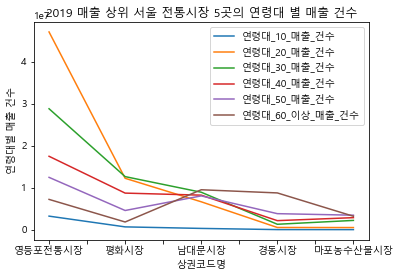

In [94]:
desc_sum_sales[['연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수']].plot()
plt.title("2019 매출 상위 서울 전통시장 5곳의 연령대 별 매출 건수")
plt.xlabel("상권코드명")
plt.ylabel("연령대별 매출 건수")
# plt.draw()
# fig = plt.gcf()
# fig.savefig('./output/desc_sum_sales.png')
plt.savefig('./output/desc_sum_sales.png') # 위에꺼 필요 없고 이거 한 줄이면 저장됨
plt.show()

In [31]:
# 8. DataFrame의 내용을 CSV, Excel로 저장하는 스크립트를 제작하시오.

# 1. text, csv 파일로 저장
# 인코딩을 utf-8-sig로 하면서 BOM(Byte Order Mark)을 없앤다. 
# Linux에서 에러 방지,  windows utf-8 사용 상관 없음
desc_sum_sales.to_csv('./output/desc_sum_sales_df.csv', index=True, encoding='utf-8-sig')

# Excel 저장
desc_sum_sales.to_excel('./output/desc_sum_sales_df.xlsx', index=True)

In [32]:
# 9. CSV, Excel로 저장된 내용을 DataFrame으로 로딩하는 스크립트를 제작하시오.
df4 = pd.read_csv('./output/desc_sum_sales_df.csv')
df4.head()

# 엑셀파일 불러오기 
df5 = pd.read_excel('./output/desc_sum_sales_df.xlsx')
df5

,상권_코드_명,당월_매출_금액,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,영등포전통시장,2723728408698,3219744,47064325,28781964,17466461,12449390,7204216
1,평화시장,2485200693467,662101,12227506,12627385,8702141,4562315,1825993
2,남대문시장,1592206338359,297259,6634291,8910133,8215187,8040233,9499258
3,경동시장,870053150880,17538,520565,1284678,2147370,3809739,8745908
4,마포농수산물시장,593366763649,10343,502099,2201535,2859440,3443728,3191717


In [ ]:
# 10. 주제로 선정된 상가에 대하여 앞으로 매출액을 개선시킬 방안을 100자 이내로 작성하고 시각화 하시오.
# 가상으로 어떤 성질의 부분의 값을 늘리던지 줄여야 매출액이 개선될 것인가의 여부로 X축의 데이터를 선택하는 문제임.
# X: ??? , Y: 매출액, 데이터(관측치, 행)는 12개월 12건으로 할 것
'''
서울시 내의 전통시장 중 월 매출액이 가장 높은 5곳의 특징을 살펴보면, 다른 시장에 비해 20,30 대가 많은 매출 건수를 차지하고 있는 것을 볼 수 있다.
20,30대 소비자의 수요를 충족시키기 위한 상품을 준비하고, 젊은 청년 창업가들을 지원하고 유치하여, 전 세대가 흥미를 가질 수 있는 전통시장의 모습을 갖춘다면,
전통시장의 총 매출액도 크게 상승할 수 있을 것으로 예상한다.
'''